In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('../data/MNIST_data/', one_hot=True)
np.random.seed(13)
train_size = 1000
test_size = 102
rand_train_indices = np.random.choice(len(mnist.train.images), train_size, replace=False)
rand_test_indices = np.random.choice(len(mnist.test.images), test_size, replace=False)
x_vals_train = mnist.train.images[rand_train_indices]
x_vals_test = mnist.test.images[rand_test_indices]
y_vals_train = mnist.train.labels[rand_train_indices]
y_vals_test = mnist.test.labels[rand_test_indices]

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
with tf.Session() as sess:
    k = 4
    bs = 6
    
    x_data_train = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    x_data_test = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    y_target_train = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    y_target_test = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    distance = tf.reduce_sum(tf.abs(
        tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)
    
    top_k_xvals, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    prediction_indices = tf.gather(y_target_train, top_k_indices)
    count_of_predictions = tf.reduce_sum(prediction_indices, axis=1)
    prediction = tf.argmax(count_of_predictions, axis=1)
    num_loops = int(np.ceil(len(x_vals_test) / bs))
    
    test_output = []
    actual_vals = []
    for i in range(num_loops):
        min_index = i * bs
        max_index = min((i + 1) * bs, len(x_vals_train))
        x_batch = x_vals_test[min_index:max_index]
        y_batch = y_vals_test[min_index:max_index]
        predictions = sess.run(prediction, feed_dict={
            x_data_train: x_vals_train,
            x_data_test: x_batch,
            y_target_train: y_vals_train,
            y_target_test: y_batch,
        })
        test_output.extend(predictions)
        actual_vals.extend(np.argmax(y_batch, axis=1))

accuracy = sum([1. / test_size for i in range(test_size) if test_output[i] == actual_vals[i]])
print('Accuracy on test set: ' + str(accuracy))

Accuracy on test set: 0.8823529411764696


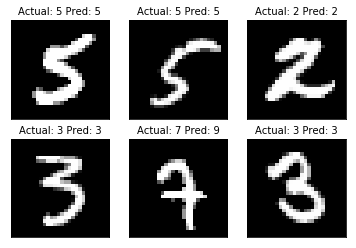

In [8]:
actuals = np.argmax(y_batch, axis=1)

nrows = 2
ncols = 3
for i in range(len(actuals)):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(np.reshape(x_batch[i], [28, 28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' +
              str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)